# Population in Ireland

## 1 Data Reading and Cleaning

### 1.1 Reading Data


We use some useful libraries for our project.
These are:
- Pandas: A versatile data manipulation and analysis library. It provides easy-to-use data structures and functions for working with structured data, making it an essential tool for data processing and analysis.
- Numpy: A fundamental library for numerical operations in Python. It offers support for arrays, matrices, and various mathematical functions, making it an essential tool for scientific computing and data analysis.
- Seaborn: A data visualization library based on Matplotlib. Seaborn provides an interface for creating informative and attractive statistical graphics, which is particularly useful for exploring and understanding complex datasets.
- Matplotlib.pyplot: A widely used plotting library for creating static, animated, or interactive visualizations in Python. It is a fundamental tool for data visualization and report generation in a wide range of domains.
- %matplotlib inline: This magic command in Jupyter Notebook allows the generated plots or visualizations to be displayed directly within the notebook. It's particularly useful when using libraries like Matplotlib for data visualization.

In [1]:
import pandas as pd               # Used for data analysis and processing.
import numpy as np                # Used for multi-dimensional arrays and mathematical operations.
import seaborn as sns             # Provides a high-level interface for data visualization.
import matplotlib.pyplot as plt   # Used for creating plots and graphs.
%matplotlib inline
sns.set(color_codes=True)

In [2]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [3]:
df=pd.read_csv("PEA01.20231007T221014.csv") # we read dataset

In [4]:
df.head(5) # We dispplay first 5 rows

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,Population Estimates (Persons in April),1950,Under 1 year,Both sexes,Thousand,61.1
1,Population Estimates (Persons in April),1950,Under 1 year,Male,Thousand,31.4
2,Population Estimates (Persons in April),1950,Under 1 year,Female,Thousand,29.7
3,Population Estimates (Persons in April),1950,0 - 4 years,Both sexes,Thousand,NaN
4,Population Estimates (Persons in April),1950,0 - 4 years,Male,Thousand,NaN


In [5]:
df.tail(5) # We display last 5 rows

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
5989,Population Estimates (Persons in April),2023,85 years and over,Male,Thousand,33.1
5990,Population Estimates (Persons in April),2023,85 years and over,Female,Thousand,53.9
5991,Population Estimates (Persons in April),2023,All ages,Both sexes,Thousand,5281.6
5992,Population Estimates (Persons in April),2023,All ages,Male,Thousand,2606.2
5993,Population Estimates (Persons in April),2023,All ages,Female,Thousand,2675.4


In [6]:
# We calculate how many we have rows and columns with shape method
total_rows=df.shape[0]
total_columns=df.shape[1]
print(f"Total Rows= {total_rows}")
print(f"Total Columns= {total_columns}")

Total Rows= 5994
Total Columns= 6


#### df.describe()
- The df.describe() command is used to display a basic statistical summary (count, mean, std, min, max, etc.) of a Pandas DataFrame.
- This command provides a quick overview of the data distribution for columns containing numerical values within the DataFrame.
- By default, a statistical summary is generated only for numeric columns.



In [7]:
df.describe() # We use this method to see summary of columns numerical (numeric) data

,Year,VALUE
count,5994.000000,5880.000000
mean,1986.500000,347.001088
std,21.361791,601.822682
min,1950.000000,5.500000
25%,1968.000000,79.475000
50%,1986.500000,151.700000
75%,2005.000000,307.725000
max,2023.000000,5281.600000


#### df.describe(include="object")
- The df.describe(include="object") command displays a statistical summary of columns containing categorical (object) data within a Pandas DataFrame.
- This command provides information such as the number of categorical data, the number of unique values, the most frequent value, and the frequency of the most common value.
- It is useful for understanding the characteristics and distribution of categorical data.

In [8]:
df.describe(include="object") # We use this method to see summary of columns containing categorical (object) data

,STATISTIC Label,Age Group,Sex,UNIT
count,5994,5994,5994,5994
unique,1,27,3,1
top,Population Estimates (Persons in April),Under 1 year,Both sexes,Thousand
freq,5994,222,1998,5994


#### df.dtypes
- The df.dtypes is an attribute in pandas that displays the data types of each column in a DataFrame or Series.
- This allows you to inspect the data type of each column in the DataFrame, such as integers, floats, object, etc.

In [9]:
df.dtypes # We use this method to see the data types of each columns

STATISTIC Label     object
Year                 int64
Age Group           object
Sex                 object
UNIT                object
VALUE              float64
dtype: object

#### df.nunique()
- The df.nunique() is a method in Pandas that returns the number of unique (distinct) values in each column of a DataFrame. - we can use this method to find the count of different values in each column.

In [10]:
df.nunique() # We use this method to find the count of different values in each column.

STATISTIC Label       1
Year                 74
Age Group            27
Sex                   3
UNIT                  1
VALUE              3387
dtype: int64

#### df.count()
- The df.count() is a method in Pandas that returns the total number of non-null (non-NaN) values in each column of a DataFrame.
- It can be used to calculate the count of missing data (NaN) in each column.

In [11]:
df.count() # We use this method to calculate the number of non-null (non-NaN) values in each column.

STATISTIC Label    5994
Year               5994
Age Group          5994
Sex                5994
UNIT               5994
VALUE              5880
dtype: int64

In [12]:
df.isnull().sum() # We use this method to calculate the number of null (NaN) values in each column.

STATISTIC Label      0
Year                 0
Age Group            0
Sex                  0
UNIT                 0
VALUE              114
dtype: int64

In [13]:
df.duplicated().sum() # We use this method to calculate the number of duplicated rows

0

In [14]:
# We drop some columns which we do not use because these columns include just one unique value
to_drop=["STATISTIC Label","UNIT"] 
df.drop(columns=to_drop,inplace=True)

In [15]:
# We rename the 'VALUE' column to maintain consistent column title style.
df=df.rename(columns={"VALUE":"Value"})

In [16]:
df["Value"]

0         61.1
1         31.4
2         29.7
3          NaN
4          NaN
         ...  
5989      33.1
5990      53.9
5991    5281.6
5992    2606.2
5993    2675.4
Name: Value, Length: 5994, dtype: float64

In [17]:
#df["Value"]=(df["Value"]*1000) # we changed the value because we drop UNIT column where it is writing exact value label

In [18]:
missing_df=df[df.isna().any(axis=1)] #missing data rows
missing_df

,Year,Age Group,Sex,Value
3,1950,0 - 4 years,Both sexes,NaN
4,1950,0 - 4 years,Male,NaN
5,1950,0 - 4 years,Female,NaN
165,1952,0 - 4 years,Both sexes,NaN
166,1952,0 - 4 years,Male,NaN
...,...,...,...,...
3568,1994,0 - 4 years,Male,NaN
3569,1994,0 - 4 years,Female,NaN
3648,1995,0 - 4 years,Both sexes,NaN
3649,1995,0 - 4 years,Male,NaN


In [19]:
all_0_4=df[(df["Age Group"]=="0 - 4 years")]
all_0_4

,Year,Age Group,Sex,Value
3,1950,0 - 4 years,Both sexes,NaN
4,1950,0 - 4 years,Male,NaN
5,1950,0 - 4 years,Female,NaN
84,1951,0 - 4 years,Both sexes,312.9
85,1951,0 - 4 years,Male,160.0
...,...,...,...,...
5836,2022,0 - 4 years,Male,151.6
5837,2022,0 - 4 years,Female,144.2
5916,2023,0 - 4 years,Both sexes,293.8
5917,2023,0 - 4 years,Male,149.2


In [20]:
# We fill the missing data in the "0 - 4 years" age group with the sum of "Under 1 year" and "1 - 4 years" age groups.

for year in df['Year'].unique():
    for sex in df['Sex'].unique():
        total_value = df[(df['Year'] == year) & (df['Sex'] == sex) & 
                         (df['Age Group'].isin(['Under 1 year', '1 - 4 years']))]['Value'].sum()
        missing_value = (df['Year'] == year) & (df['Sex'] == sex) & (df['Age Group'] == '0 - 4 years')
        df.loc[missing_value, 'Value'] = total_value

# After filling in the missing data, we view the first and last 5 values of the data frame.
print(df.head(5))
print(df.tail(5))

   Year     Age Group         Sex  Value
0  1950  Under 1 year  Both sexes   61.1
1  1950  Under 1 year        Male   31.4
2  1950  Under 1 year      Female   29.7
3  1950   0 - 4 years  Both sexes  310.2
4  1950   0 - 4 years        Male  158.9
      Year          Age Group         Sex   Value
5989  2023  85 years and over        Male    33.1
5990  2023  85 years and over      Female    53.9
5991  2023           All ages  Both sexes  5281.6
5992  2023           All ages        Male  2606.2
5993  2023           All ages      Female  2675.4


In [21]:
all_0_4=df[(df["Age Group"]=="0 - 4 years")]
all_0_4

,Year,Age Group,Sex,Value
3,1950,0 - 4 years,Both sexes,310.2
4,1950,0 - 4 years,Male,158.9
5,1950,0 - 4 years,Female,151.3
84,1951,0 - 4 years,Both sexes,312.9
85,1951,0 - 4 years,Male,160.2
...,...,...,...,...
5836,2022,0 - 4 years,Male,151.5
5837,2022,0 - 4 years,Female,144.2
5916,2023,0 - 4 years,Both sexes,293.8
5917,2023,0 - 4 years,Male,149.2


In [28]:
#df['Age Group'].unique()

In [29]:
#df['Year'].unique()

In [30]:
#df['Sex'].unique()

In [25]:
import ipywidgets as widgets
from IPython.display import display

# Identify options
year_option = df['Year'].unique()
age_group_option = df['Age Group'].unique()
sex_option = df['Sex'].unique()

# Create dropdown widget
dropdown_year = widgets.Dropdown(options=year_option,description="Year:")
dropdown_age_group = widgets.Dropdown(options=age_group_option,description="Age Group:")
dropdown_sex = widgets.Dropdown(options=sex_option,description="Sex:")

# Show Widget
print("Please select a option!")
display(dropdown_year)
display(dropdown_age_group)
display(dropdown_sex)

Please select a option!


Dropdown(description='Year:', options=(1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,…

Dropdown(description='Age Group:', options=('Under 1 year', '0 - 4 years', '0 - 14 years', '1 - 4 years', '5 -…

Dropdown(description='Sex:', options=('Both sexes', 'Male', 'Female'), value='Both sexes')

In [49]:
year = dropdown_year.value
age_group = dropdown_age_group.value
sex= dropdown_sex.value

result = df[(df['Year'] == year) & (df['Age Group'] == age_group) & (df['Sex'] == sex)]['Value'].values[0]
print(f"In '{year}', the result for the age group '{age_group}', and the sex '{sex}' is: {result}")

In '1965', the result for the age group '0 - 4 years', and the sex 'Both sexes' is: 313.4


In [50]:
table_year_age_group = df[(df['Year'] == year) & (df['Age Group'] == age_group)]
table_year_age_group

,Year,Age Group,Sex,Value
1218,1965,0 - 4 years,Both sexes,313.4
1219,1965,0 - 4 years,Male,160.1
1220,1965,0 - 4 years,Female,153.3


In [51]:
table_age_group_sex = df[(df['Age Group'] == age_group) & (df["Sex"] == sex)]
table_age_group_sex

,Year,Age Group,Sex,Value
3,1950,0 - 4 years,Both sexes,310.2
84,1951,0 - 4 years,Both sexes,312.9
165,1952,0 - 4 years,Both sexes,310.3
246,1953,0 - 4 years,Both sexes,308.2
327,1954,0 - 4 years,Both sexes,305.9
...,...,...,...,...
5592,2019,0 - 4 years,Both sexes,315.0
5673,2020,0 - 4 years,Both sexes,308.7
5754,2021,0 - 4 years,Both sexes,300.9
5835,2022,0 - 4 years,Both sexes,295.9


In [32]:
#year = dropdown_year.value
#age_group = dropdown_age_group.value
#sex= dropdown_sex.value
#print("Year:", year)
#print("Age Group:", age_group)
#print("Sex:", sex,"\n")

## We print the result for a specific year, age group, and sex.
#result = df[(df['Year'] == year) & (df['Age Group'] == age_group) & (df['Sex'] == sex)]['Value'].values[0]
#print(f"In '{year}', the result for the age group '{age_group}', and the sex '{sex}' is: {result}")

In [36]:
# year = 1965
# age_range = "1 - 4 years"
# sex = "Both sexes"

# # We print the result for a specific year, age range, and gender.
# result = df[(df['Year'] == year) & (df['Age Group'] == age_range) & (df['Sex'] == sex)]['Value'].values[0]
# print(f"In {year}, the result for the age group {age_range}, and the gender {sex} is: {result}")

In [52]:
# toplam_yas = df[(df['Year'] == 1965) & (df['Sex'] == "Both sexes") & (df['Age Group'].isin(['Under 1 year', '1 - 4 years']))]['Value'].sum()
# toplam_yas

In [65]:
#all_0_4=df[(df["Age Group"]=="0 - 4 years")]
#all_0_4.head(5)

In [64]:
#all_0_4.shape

In [63]:
#all_0_4.isnull().sum()

In [66]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x,y

In [ ]:
total_value = year_1950['Value'].sum()
print("Toplam Değer:", total_value)

In [141]:
a=df[(df["Sex"]=="Both sexes") & (df["Age Group"]=="All ages")]
#a=a[a["Year"]>=1990]
a

,Year,Age Group,Sex,Value
78,1950,All ages,Both sexes,2969.0
159,1951,All ages,Both sexes,2960.6
240,1952,All ages,Both sexes,2952.9
321,1953,All ages,Both sexes,2949.0
402,1954,All ages,Both sexes,2941.2
...,...,...,...,...
5667,2019,All ages,Both sexes,4958.5
5748,2020,All ages,Both sexes,5029.9
5829,2021,All ages,Both sexes,5074.7
5910,2022,All ages,Both sexes,5184.0


In [142]:
a["Value"]=a["Value"]/1000
a

,Year,Age Group,Sex,Value
78,1950,All ages,Both sexes,2.9690
159,1951,All ages,Both sexes,2.9606
240,1952,All ages,Both sexes,2.9529
321,1953,All ages,Both sexes,2.9490
402,1954,All ages,Both sexes,2.9412
...,...,...,...,...
5667,2019,All ages,Both sexes,4.9585
5748,2020,All ages,Both sexes,5.0299
5829,2021,All ages,Both sexes,5.0747
5910,2022,All ages,Both sexes,5.1840


In [143]:
 x_total, y_year = ecdf(a["Value"])

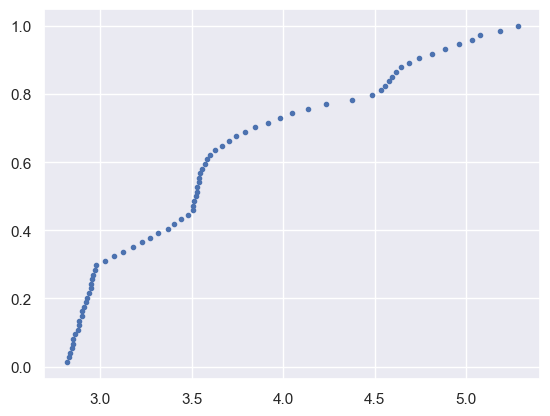

In [144]:
plt.plot(x_total, y_year, marker=".", linestyle="none")
plt.show()

In [145]:
#x_ticks = range(min(a["Year"]), max(a["Year"])+1,10)

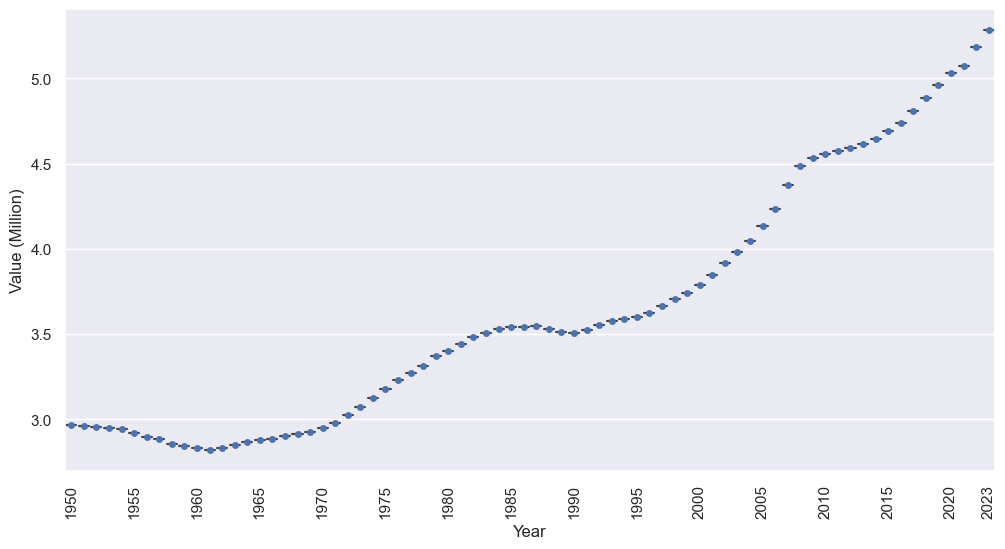

In [153]:

plt.figure(figsize=(12,6))
sns.boxplot(x="Year", y="Value",data=a)
sns.swarmplot(x="Year", y="Value",data=a)
# Label the axes
plt.xlabel("Year")
plt.ylabel("Value (Million)")

years = [str(year) for year in range(min(a["Year"]), max(a["Year"]), 5)]  # 10 yıl aralıklarıyla yıllar
years.append("2023")
plt.xticks(ticks=years, rotation=90)

# Show the plot
plt.show()

<Axes: xlabel='Value'>

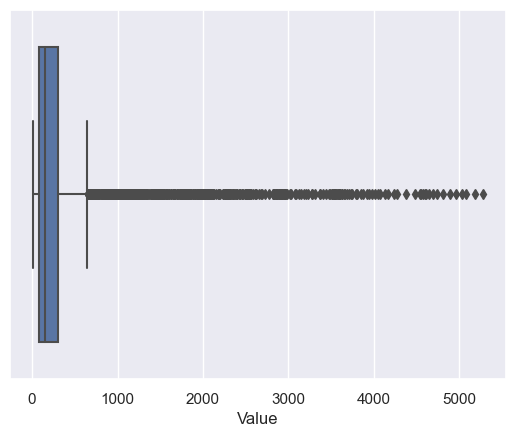

In [72]:
sns.boxplot(x=df["Value"])

In [73]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Year      37.00
Value    227.15
dtype: float64


In [74]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [75]:
outliers = (df < lower_bound) | (df > upper_bound)

In [76]:
outliers_df = df[outliers.any(axis=1)]

In [77]:
outliers_df

,Year,Age Group,Sex,Value
6,1950,0 - 14 years,Both sexes,851.2
24,1950,15 years and over,Both sexes,2117.8
25,1950,15 years and over,Male,1075.4
26,1950,15 years and over,Female,1042.4
33,1950,25 - 44 years,Both sexes,773.6
...,...,...,...,...
5963,2023,45 - 64 years,Female,677.2
5976,2023,65 years and over,Both sexes,806.3
5991,2023,All ages,Both sexes,5281.6
5992,2023,All ages,Male,2606.2


In [78]:
df

,Year,Age Group,Sex,Value
0,1950,Under 1 year,Both sexes,61.1
1,1950,Under 1 year,Male,31.4
2,1950,Under 1 year,Female,29.7
3,1950,0 - 4 years,Both sexes,310.2
4,1950,0 - 4 years,Male,158.9
...,...,...,...,...
5989,2023,85 years and over,Male,33.1
5990,2023,85 years and over,Female,53.9
5991,2023,All ages,Both sexes,5281.6
5992,2023,All ages,Male,2606.2


In [ ]:
df.hist(column="Value",bins=20)

In [ ]:
df["Age Group"].unique()

In [ ]:
Age_Group_Value_Counts=pd.crosstab(index=df["Age Group"],columns="Value")

In [ ]:
Age_Group_Value_Counts

In [ ]:
from numpy import median, mean

In [ ]:
sns.set(style="whitegrid")

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x="Age Group", y="Value", hue="Age Group", data=df)
plt.xticks(rotation=90)
plt.legend(loc="upper right",bbox_to_anchor=(1.2,1))

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x="Age Group",y="Value",hue="Sex");
plt.xticks(rotation=90);
plt.legend(loc="upper right",bbox_to_anchor=(1.2,1))

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x="Year",y="Value",hue="Age Group");
plt.ylabel("Value (Thousand)")
plt.xticks(rotation=90);
plt.legend(loc="upper right",bbox_to_anchor=(1.2,1));

In [ ]:
import math
subset_0_14_years=df[(df["Age Group"]=="0 - 14 years")]
print(subset_0_14_years,"\n\n")
print("Minimum value:\n",subset_0_14_years.min(),"\n")
print("Maximum value:\n",subset_0_14_years.max(),"\n")

In [ ]:
#min_value=(subset_0_14_years["Value"].apply(math.ceil).min())-1
#max_value=subset_0_14_years["Value"].max()
min_value=subset_0_14_years["Value"].apply(lambda x: (math.ceil(x/100)*100)-100).min()
max_value=subset_0_14_years["Value"].apply(lambda x: math.ceil(x/100)*100).max()
plt.figure(figsize=(12,6))
sns.scatterplot(data=subset_0_14_years,x="Year",y="Value",hue="Sex");
plt.xticks(rotation=90);
plt.ylabel("Value (Thousand)")
plt.yticks(np.arange(min_value, max_value, step=30))
plt.legend(loc="upper right",bbox_to_anchor=(1.16,1.02));

In [ ]:
#min_value=(subset_0_14_years["Value"].apply(math.ceil).min())-1
max_value=subset_0_14_years["Value"].max()
min_value=subset_0_14_years["Value"].apply(lambda x: (math.ceil(x/100)*100)-100).min()
plt.figure(figsize=(12,6))
sns.scatterplot(data=subset_0_14_years,x="Year",y="Value",hue="Sex");
plt.xticks(rotation=90);
plt.ylabel("Value (Thousand)")

plt.yticks(np.arange(min_value, max_value, step=30))
plt.legend(loc="upper right",bbox_to_anchor=(1.16,1.02));

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=subset_0_14_years,x="Year",y="Value",hue="Sex");
plt.xticks(rotation=90);
plt.ylabel("Value (Thousand)")
plt.legend(loc="upper right",bbox_to_anchor=(1.16,1.02));

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(subset_0_14_years["Year"], subset_0_14_years["Value"])
ax.set_title("Value By Years")
ax.set_xlabel("Year")
ax.set_ylabel("Value")
plt.show()

In [ ]:
subset_0_4_years=df[(df["Age Group"]=="0 - 4 years") & (df["Sex"]=="Male")]
print(subset_0_4_years.head(),"\n\n")
print("Minimum value:\n",subset_0_4_years.min(),"\n")
print("Maximum value:\n",subset_0_4_years.max(),"\n")

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df["Age Group"], df["Value"])
ax.set_xlabel("Age Group")
plt.xticks(rotation=90)
ax.set_ylabel("Value")
plt.title("Value By Age Group")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df["Age Group"]=="0 - 14 years", df["Value"])
ax.set_xlabel("Age Group")
ax.set_ylabel("Value")
plt.show()

In [ ]:

# # Kategorik verileri sayısal olarak kodlayalım
# df['Age Group Code'] = pd.Categorical(df['Age Group']).codes

# # Sütunları x, y ve renk olarak kullanarak scatter plot oluşturun
# fig, ax = plt.subplots(figsize=(12, 10))
# scatter = ax.scatter(df["Year"], df["Value"], c=df["Age Group Code"], cmap='viridis', marker='o')

# # Renk skalasını oluşturun ve eksen etiketlerini ayarlayın
# cbar = plt.colorbar(scatter)
# cbar.set_label("Age Group")
# ax.set_xlabel("Year")
# ax.set_ylabel("Value")
# plt.show()




In [ ]:
# df["Age Group"].unique()

In [ ]:
# # Belirlediğiniz renk listesi
# colors = ['red', 'green', 'blue', 'orange', 'purple']

# # Her bir "Age Group" kategorisi için "VALUE" sütununun ortalamasını hesaplayalım
# grouped_data = df.groupby('Age Group')['Value'].mean()

# # Çubuk grafik oluşturalım ve belirlediğiniz renkleri kullanalım
# fig, ax = plt.subplots(figsize=(10, 6))
# grouped_data.plot(kind='bar', ax=ax, color=colors)
# ax.set_xlabel("Age Group")
# ax.set_ylabel("Average Value")
# plt.show()

In [ ]:
# # Kategorik verileri sayısal olarak kodlayalım
# age_group_order = [
#     'Under 1 year', '0 - 4 years', '0 - 14 years', '1 - 4 years', '5 - 9 years', '10 - 14 years',
#     '15 - 19 years', '15 - 24 years', '15 years and over', '20 - 24 years',
#     '25 - 29 years', '25 - 44 years', '30 - 34 years', '35 - 39 years', '40 - 44 years',
#     '45 - 49 years', '45 - 64 years', '50 - 54 years', '55 - 59 years',
#     '60 - 64 years', '65 - 69 years', '65 years and over', '70 - 74 years',
#     '75 - 79 years', '80 - 84 years', '85 years and over', 'All ages'
# ]

# df['Age Group'] = pd.Categorical(df['Age Group'], categories=age_group_order, ordered=True)
# df['Age Group Code'] = df['Age Group'].cat.codes

# # Sütunları x, y ve renk olarak kullanarak scatter plot oluşturun
# fig, ax = plt.subplots(figsize=(12, 10))
# scatter = ax.scatter(df["Year"], df["Value"], c=df["Age Group Code"], cmap='viridis', marker='o')

# # Renk skalasını oluşturun ve eksen etiketlerini ayarlayın
# cbar = plt.colorbar(scatter)
# cbar.set_label("Age Group")
# ax.set_xlabel("Year")
# ax.set_ylabel("Value")
# plt.show()